In [1]:
import pandas as pd
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from functions import *
directory = os.path.abspath("")
os.chdir(directory)
print(os.listdir(directory))

['.git', '.gitignore', 'Analysis (R).R', 'app.py', 'datamdata', 'dataset.png', 'descarga.jfif', 'Excel Analysis(Pablo).ipynb', 'functions.py', 'geckodriver.log', 'img', 'my_pickle_file.pickle', 'README.md', '__pycache__']


In [2]:
xls = pd.ExcelFile('datamdata/Study Results.xlsx')
df1 = pd.read_excel(xls, 'Dataset_S1',)
df2 = pd.read_excel(xls, 'Dataset_S2')


# Research Proofs


### Chronichally photoexposed vs Intermitently Photexposed
The research tells that how the skin were exposed more to the skin, you will be more likely to suffer somatic mutations.
This plot reflects how many mutations as average and standard deviation we have respect to the samples that are intermitently and chronically  exposed

#### Average and Standard deviation of mutations 
The first plot represent the average and sd of mutations that have samples which are intermittently and continuously exposed to sunlight

<AxesSubplot:xlabel='UV_exposure_tissue', ylabel='n_of_mutations'>

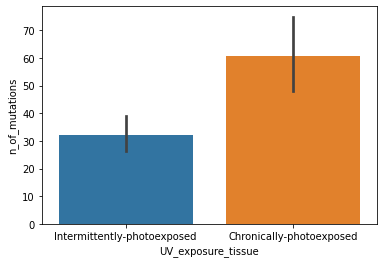

In [3]:
merging = df1.merge(df2,on="sampleID",how="inner")
plot = merging.groupby("sampleID").agg({"gene_name":"count"}).merge(df2[["sampleID","UV_exposure_tissue"]],on="sampleID",how="inner")
plot = plot.rename(columns={"gene_name":"n_of_mutations"})
sns.barplot(data=plot,x="UV_exposure_tissue",y="n_of_mutations")

In [4]:
plot2= df2.merge(merging.groupby("sampleID").agg({"gene_name":"count"}).reset_index(),on="sampleID",how="inner")
plot2 =plot2.rename(columns={"gene_name":"n_mutations"})
plot2.n_mutations = plot2.n_mutations.astype(int)

Text(0.5, 0.98, 'Regression of number of mutations per skin phototype')

<Figure size 360x216 with 0 Axes>

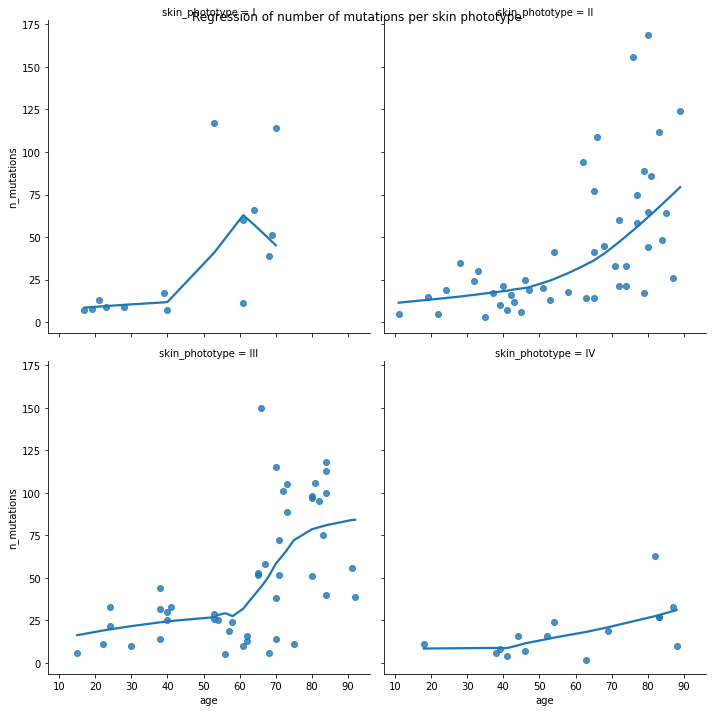

In [5]:
fig = plt.figure(figsize=(5,3))
sns.lmplot(data=plot2.sort_values(by="skin_phototype"),x="age",y="n_mutations",col="skin_phototype",lowess=True,col_wrap=2)
plt.suptitle("Regression of number of mutations per skin phototype")

# g = sns.FacetGrid(plot2.sort_values(by="skin_phototype") )
# g.map(sns.scatterplot, x="age", y="n_mutations")

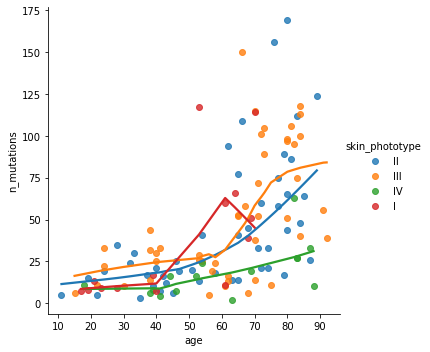

In [6]:

sns.lmplot(data=plot2,x="age",y="n_mutations",hue="skin_phototype",lowess=True)

#### Number of samples that has a mutation at least one time per  gene
This takes the number of times that a gene appears at least once time in the samples intermittently and continuously exposed.
The first plots is used for the samples that are intermittently exposed and the second plot is used for the ones which are continously exposed 

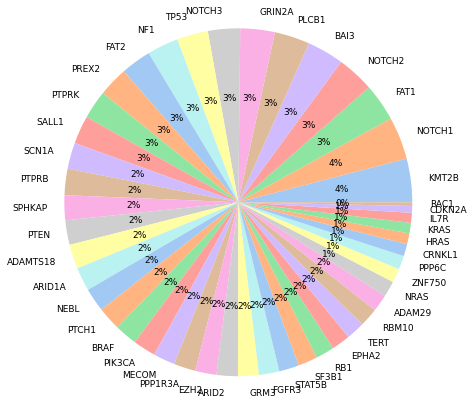

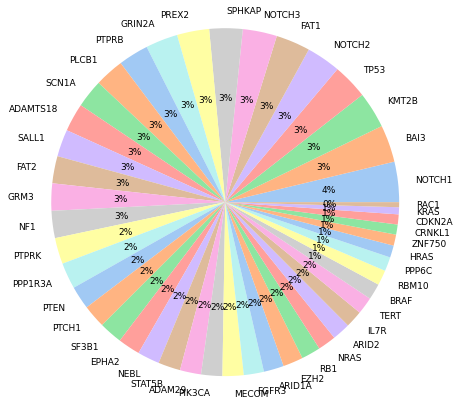

In [7]:
pieplot(merging,0)
pieplot(merging,1)

#### Looking how many times a gene is mutated per sampleId 
We though in watching not only how many times a gene appears at leas tonce but we look for the average of times that a mutation appears,
the minimum number of times and maximum and how many times a gene appears 

In [8]:
lookforgene="ADAM29"

In [9]:

dfgenes = mergecontintinfo(merging)
dfgenes["mean_mut"] = dfgenes["mean"]

In [10]:
dfgenes.UV_exposure_tissue.unique()

array(['Chronically-photoexposed', 'Intermittently-photoexposed'],
      dtype=object)

In [11]:
import plotly.express as px
### Depending on what result you want you return one or another
def filterp4(dfgenes,id=0):
    if id==0 or id==1:

        if id==0:
            chexposed=  dfgenes[dfgenes.UV_exposure_tissue=="Intermittently-photoexposed"].sort_values(by=["mean_mut"],ascending=False)
        if id==1:
            chexposed=  dfgenes[dfgenes.UV_exposure_tissue=="Chronically-photoexposed"].sort_values(by=["mean_mut"],ascending=False)
        return px.bar(chexposed,x="gene_name",y="mean_mut",error_y="std")
    if id==2:
        return px.bar(dfgenes,x="gene_name",y="mean_mut",color="UV_exposure_tissue",barmode='group',error_y="std")


#### ContExposed 
chexposed = dfgenes[dfgenes.UV_exposure_tissue=="Chronically-photoexposed"].sort_values(by=["mean_mut"],ascending=False)
fig = px.bar(chexposed,x="gene_name",y="mean_mut",error_y="std")
fig.show()
### IntExposed 
intexposed = dfgenes[dfgenes.UV_exposure_tissue=='Intermittently-photoexposed'].sort_values(by=["mean_mut"],ascending=False)
fig = px.bar(intexposed,x="gene_name",y="mean_mut",error_y="std")
fig.show()

In [12]:
### General View
px.bar(dfgenes,x="gene_name",y="mean_mut",color="UV_exposure_tissue",barmode='group',error_y="std")

### Exploring genes that have Cosmic Id
In this section we are going to explore which mutations have cosmic id to know some information about where the mutation usually occur (in which tissue), if the mutation may be pathogenic, ... 

In [13]:
merging

sampleID chr        pos ref mut mut_type    DP     VAF gene_name  \
0      AE6464  20    8865240  CA   C    Indel  1036  0.0125     PLCB1   
1      AE6464   4  187541520   G   A      G>A   999  0.0080      FAT1   
2      AE6464   6   70098685   G   A      G>A  1065  0.0075      BAI3   
3      AE6464  12   70986362   G   A      G>A   496  0.0121     PTPRB   
4      AE6464  17   29554310   G   T      G>T   320  0.0125       NF1   
...       ...  ..        ...  ..  ..      ...   ...     ...       ...   
5209   AG0391   7   86493764   A   G      A>G   426  0.0141      GRM3   
5210   AG0391   9  139400380   G  GC    Indel   644  0.0124    NOTCH1   
5211   AG0391   9  139412380  GG  AA    Indel   636  0.0142    NOTCH1   
5212   AG0391   2  228845548   A   G      A>G   288  0.0139    SPHKAP   
5213   AG0391   9   98215704   A   G      A>G   294  0.0170     PTCH1   

              gene_ID  ...                                HGVS.p ExAC_AF  \
0     ENSG00000182621  ...                                   NaN     NaN   
1     ENSG00000083857  ...                            p.Gln2074*     NaN   
2     ENSG00000135298  ...  p.Glu1491Lys;p.Glu455Lys;p.Glu697Lys     NaN   
3     ENSG00000127329  ...                                   NaN     NaN   
4     ENSG00000196712  ...                                   NaN     NaN   
...               ...  ...                                   ...     ...   
5209  ENSG00000198822  ...                                   NaN     NaN   
5210  ENSG00000148400  ...                                   NaN     NaN   
5211  ENSG00000148400  ...                           p.Pro422Phe     NaN   
5212  ENSG00000153820  ...                                   NaN     NaN   
5213  ENSG00000185920  ...                                   NaN     NaN   

        COSMIC_ID     sex age           UV_exposure_tissue  sun_damage_tissue  \
0             NaN  Female  74  Intermittently-photoexposed                Yes   
1             NaN  Female  74  Intermittently-photoexposed                Yes   
2     COSM1445665  Female  74  Intermittently-photoexposed                Yes   
3             NaN  Female  74  Intermittently-photoexposed                Yes   
4             NaN  Female  74  Intermittently-photoexposed                Yes   
...           ...     ...  ..                          ...                ...   
5209          NaN  Female  61     Chronically-photoexposed                NaN   
5210          NaN  Female  61     Chronically-photoexposed                NaN   
5211          NaN  Female  61     Chronically-photoexposed                NaN   
5212          NaN  Female  61     Chronically-photoexposed                NaN   
5213          NaN  Female  61     Chronically-photoexposed                NaN   

       sun_history skin_phototype MC1R_genotype  
0       Frequently             II     R alleles  
1       Frequently             II     R alleles  
2       Frequently             II     R alleles  
3       Frequently             II     R alleles  
4       Frequently             II     R alleles  
...            ...            ...           ...  
5209  Occasionally              I            WT  
5210  Occasionally              I            WT  
5211  Occasionally              I            WT  
5212  Occasionally              I            WT  
5213  Occasionally              I            WT  

[5214 rows x 22 columns]

In [14]:
#### Cosmicinformation
cosmicinfo = merging[merging.COSMIC_ID.isna()==False].groupby(["gene_name","COSMIC_ID"]).count()
#### Cosmic ids
cinfo = cosmicinfo.reset_index() 
cid = cinfo["COSMIC_ID"]

### Read info scrapped 

cosbase = read_scrap()
cosmicdb = gendfclean(cosbase,cid)
cosmerge = merging.merge(cosmicdb,left_on="COSMIC_ID",right_on="cosmic_id",how="inner")
cosmerge.sampleID.unique()

# ### Pathogenic mutations
# pathogenic_patients = (cosmerge[cosmerge.score>0.7])
# prop_path_cid = round(len(pathogenic_patients)/len(cosmerge),2)
# print("Proportion of patients with cosmic_id that have pathogenic mutations: {}".format(prop_path_cid))

array(['AE6464', 'AG0272', 'AG0282', 'AG0290', 'AG0295', 'AG0329',
       'AE6466', 'AE6474', 'AG0285', 'AE6467', 'AE6468', 'AG0293',
       'AG0299', 'AG0308', 'AG0371', 'AG0277', 'AG0336', 'AG0346',
       'AG0367', 'AE6469', 'AE6472', 'AG0301', 'AG0359', 'AE6475',
       'AG0305', 'AG0357', 'AE6483', 'AG0320', 'AG0317', 'AE6482',
       'AG0356', 'AG0358', 'AE6476', 'AG0325', 'AG0307', 'AE6477',
       'AE6478', 'AE6485', 'AG0281', 'AE6479', 'AE6480', 'AG0280',
       'AG0374', 'AE6486', 'AG0291', 'AG0335', 'AG0294', 'AG0296',
       'AG0324', 'AE6481', 'AG0289', 'AG0313', 'AG0353', 'AE6484',
       'AG0316', 'AG0270', 'AG0302', 'AG0338', 'AG0274', 'AG0275',
       'AG0276', 'AG0297', 'AG0321', 'AG0314', 'AG0284', 'AG0287',
       'AG0330', 'AG0309', 'AG0292', 'AG0312', 'AG0331', 'AG0318',
       'AG0315', 'AG0332', 'AG0334', 'AG0337', 'AG0340', 'AG0355',
       'AG0361', 'AG0363', 'AG0368', 'AG0369', 'AG0373', 'AG0370',
       'AG0389', 'AG0390'], dtype=object)

In [40]:
cosmicdb

tissue  \
0                           [Endometrium, Endometrium]   
1    [Skin, Skin, Skin, Skin, Skin, Skin, Skin, Ski...   
2                                   [Skin, Skin, Skin]   
3                 [Skin, Skin, Skin, Skin, Skin, Skin]   
4                                              [Liver]   
..                                                 ...   
343  [Liver, Lung, Ovary, Upper aerodigestive tract...   
344  [Breast, Haematopoietic and lymphoid, Prostate...   
345  [NS, NS, NS, NS, Adrenal gland, NS, NS, NS, NS...   
346  [NS, NS, NS, Biliary tract, Biliary tract, NS,...   
347  [Biliary tract, Breast, Breast, Breast, Breast...   

                                             histology  \
0                               [Carcinoma, Carcinoma]   
1    [Malignant melanoma, Carcinoma, Carcinoma, Mal...   
2    [Malignant melanoma, Malignant melanoma, Malig...   
3    [Malignant melanoma, Malignant melanoma, Malig...   
4                                          [Carcinoma]   
..                                                 ...   
343  [Carcinoma, Carcinoma, Carcinoma, Carcinoma, C...   
344  [Carcinoma, Lymphoid neoplasm, Carcinoma, Glio...   
345  [Carcinoma, Malignant melanoma, Malignant mela...   
346  [Malignant melanoma, Carcinoma, NS, Carcinoma,...   
347  [Carcinoma, Carcinoma, Carcinoma, Carcinoma, C...   

                                              zygosity  score    cosmic_id  
0                              [Heterozygous, Unknown]   0.98  COSM1053346  
1    [Heterozygous, Unknown, Unknown, Unknown, Unkn...   0.17   COSM142142  
2                     [Heterozygous, Unknown, Unknown]   0.08   COSM142145  
3    [Unknown, Unknown, Heterozygous, Unknown, Unkn...   0.01   COSM142147  
4                                       [Heterozygous]   0.00  COSM1633569  
..                                                 ...    ...          ...  
343  [Unknown, Unknown, Unknown, Unknown, Unknown, ...   0.22    COSM45120  
344  [Unknown, Unknown, Unknown, Unknown, Unknown, ...   0.96    COSM45299  
345  [Unknown, Unknown, Unknown, Heterozygous, Unkn...   0.98    COSM99020  
346  [Unknown, Unknown, Unknown, Unknown, Unknown, ...   0.95    COSM99947  
347  [Unknown, Unknown, Unknown, Unknown, Unknown, ...   0.99    COSM99950  

[324 rows x 5 columns]

In [15]:
# def showsamplestats():
merging

sampleID chr        pos ref mut mut_type    DP     VAF gene_name  \
0      AE6464  20    8865240  CA   C    Indel  1036  0.0125     PLCB1   
1      AE6464   4  187541520   G   A      G>A   999  0.0080      FAT1   
2      AE6464   6   70098685   G   A      G>A  1065  0.0075      BAI3   
3      AE6464  12   70986362   G   A      G>A   496  0.0121     PTPRB   
4      AE6464  17   29554310   G   T      G>T   320  0.0125       NF1   
...       ...  ..        ...  ..  ..      ...   ...     ...       ...   
5209   AG0391   7   86493764   A   G      A>G   426  0.0141      GRM3   
5210   AG0391   9  139400380   G  GC    Indel   644  0.0124    NOTCH1   
5211   AG0391   9  139412380  GG  AA    Indel   636  0.0142    NOTCH1   
5212   AG0391   2  228845548   A   G      A>G   288  0.0139    SPHKAP   
5213   AG0391   9   98215704   A   G      A>G   294  0.0170     PTCH1   

              gene_ID  ...                                HGVS.p ExAC_AF  \
0     ENSG00000182621  ...                                   NaN     NaN   
1     ENSG00000083857  ...                            p.Gln2074*     NaN   
2     ENSG00000135298  ...  p.Glu1491Lys;p.Glu455Lys;p.Glu697Lys     NaN   
3     ENSG00000127329  ...                                   NaN     NaN   
4     ENSG00000196712  ...                                   NaN     NaN   
...               ...  ...                                   ...     ...   
5209  ENSG00000198822  ...                                   NaN     NaN   
5210  ENSG00000148400  ...                                   NaN     NaN   
5211  ENSG00000148400  ...                           p.Pro422Phe     NaN   
5212  ENSG00000153820  ...                                   NaN     NaN   
5213  ENSG00000185920  ...                                   NaN     NaN   

        COSMIC_ID     sex age           UV_exposure_tissue  sun_damage_tissue  \
0             NaN  Female  74  Intermittently-photoexposed                Yes   
1             NaN  Female  74  Intermittently-photoexposed                Yes   
2     COSM1445665  Female  74  Intermittently-photoexposed                Yes   
3             NaN  Female  74  Intermittently-photoexposed                Yes   
4             NaN  Female  74  Intermittently-photoexposed                Yes   
...           ...     ...  ..                          ...                ...   
5209          NaN  Female  61     Chronically-photoexposed                NaN   
5210          NaN  Female  61     Chronically-photoexposed                NaN   
5211          NaN  Female  61     Chronically-photoexposed                NaN   
5212          NaN  Female  61     Chronically-photoexposed                NaN   
5213          NaN  Female  61     Chronically-photoexposed                NaN   

       sun_history skin_phototype MC1R_genotype  
0       Frequently             II     R alleles  
1       Frequently             II     R alleles  
2       Frequently             II     R alleles  
3       Frequently             II     R alleles  
4       Frequently             II     R alleles  
...            ...            ...           ...  
5209  Occasionally              I            WT  
5210  Occasionally              I            WT  
5211  Occasionally              I            WT  
5212  Occasionally              I            WT  
5213  Occasionally              I            WT  

[5214 rows x 22 columns]

In [16]:
saminfo = cosmerge[cosmerge.sampleID=="AE6464"]
saminfo.columns

Index(['sampleID', 'chr', 'pos', 'ref', 'mut', 'mut_type', 'DP', 'VAF',
       'gene_name', 'gene_ID', 'annotation', 'HGVS.c', 'HGVS.p', 'ExAC_AF',
       'COSMIC_ID', 'sex', 'age', 'UV_exposure_tissue', 'sun_damage_tissue',
       'sun_history', 'skin_phototype', 'MC1R_genotype', 'tissue', 'histology',
       'zygosity', 'score', 'cosmic_id'],
      dtype='object')

In these plots we take the different mutations with cosmic id and we plot how many times a mutation may occur in certain tissue may occurr, as well counting histologies and zygosities

In [17]:
from collections import Counter
cols = ["tissue","histology","zygosity"]
for col in cols:
    dtemp = get_N_common(cosmerge,col)
    #### Intermittently exposed
    #### Continuously exposed
    fig = px.bar(dtemp,x=dtemp.columns[0],y=dtemp.columns[1],color=dtemp.columns[2],barmode="group")
    fig.show()

#### Count how many Types of mutation has occured per gene 

In [18]:
def mut_type(x):
    if x.mut_type=="Indel":
        
            if len(x.ref)>len(x.mut):
                    return "Del"
            elif len(x.mut)>len(x.ref):
                    return "In"
        #     if len(x.ref)>1 and len(x.mut)>1:
            
            return x.ref+">"+x.mut
    return x.mut_type

#### Avergage of  Different mutitation per sample  

<AxesSubplot:xlabel='age', ylabel='Density'>

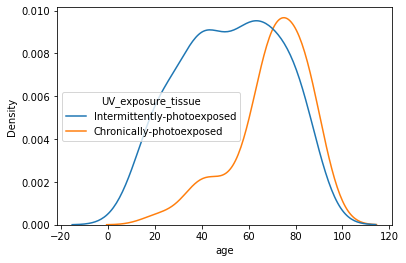

In [19]:
sns.kdeplot(data=df2, x="age", hue="UV_exposure_tissue")

<AxesSubplot:xlabel='age', ylabel='Density'>

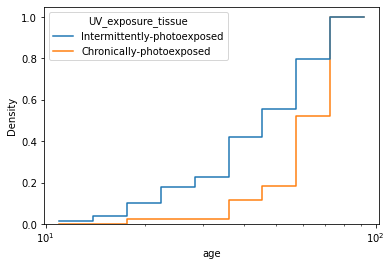

In [20]:
sns.histplot(
    data=df2, x="age", hue="UV_exposure_tissue",
   
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

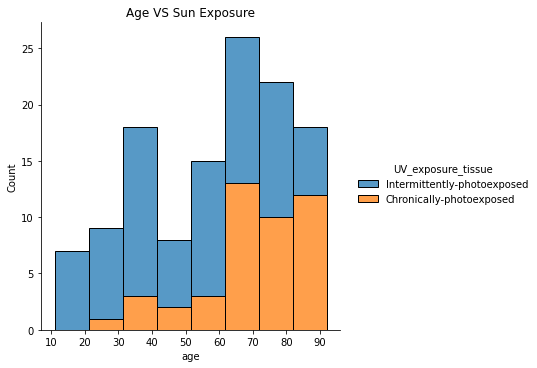

In [21]:
sns.displot(df2, x="age", hue="UV_exposure_tissue", multiple="stack").set(title='Age VS Sun Exposure')
plt.show()

In [22]:
Counter(merging.annotation[merging.mut_type=="C>T"])

Counter({'Synonymous': 137,
         'Nonsense': 51,
         'Non-coding': 429,
         'Missense': 496,
         'Splicing': 63})

In [23]:
merging["mut_type_cus"] = merging.apply(mut_type,axis=1)
plot4 = merging.groupby(["UV_exposure_tissue","mut_type_cus"]).count().reset_index().iloc[:,:3]
plot4 = plot4.rename(columns={"sampleID":"n_mut"})
px.bar(plot4,x="mut_type_cus",y="n_mut",color="UV_exposure_tissue",barmode="group")

In [24]:

mut_t_sel = merging.mut_type_cus.unique()
mut_typedf = merging[merging.mut_type=="G>A"]
annot = dict(Counter(mut_typedf.annotation).most_common(4))
px.bar(x=list(annot.keys()),y=list(annot.values()))

#### Search Info for SampleIds with CosmicIds

In [25]:
dbinfo = merging.merge(cosmicdb,left_on="COSMIC_ID",right_on="cosmic_id",how="left")
dbinfo[dbinfo.cosmic_id.isna()==False].groupby("gene_name").mean().reset_index()[["gene_name","score"]].sort_values(by="score",ascending=False)

gene_name     score
37     SF3B1  0.992500
32      RAC1  0.990000
4       BAI3  0.985000
24    PIK3CA  0.983571
21    NOTCH1  0.980000
28     PTCH1  0.980000
23    NOTCH3  0.975000
15      HRAS  0.963333
3      ARID2  0.958000
25     PLCB1  0.957500
29      PTEN  0.955000
5       BRAF  0.950000
27     PREX2  0.947273
14      GRM3  0.943846
36     SCN1A  0.942000
18     MECOM  0.942000
35     SALL1  0.941000
20       NF1  0.937500
12     FGFR3  0.932857
34     RBM10  0.930000
19      NEBL  0.926667
9       EZH2  0.914000
39      TP53  0.906264
16      IL7R  0.905000
31     PTPRK  0.880000
33       RB1  0.880000
17     KMT2B  0.860000
22    NOTCH2  0.857000
10      FAT1  0.837241
13    GRIN2A  0.832222
30     PTPRB  0.788333
2     ARID1A  0.774000
11      FAT2  0.754000
8      EPHA2  0.660000
38    SPHKAP  0.636000
1   ADAMTS18  0.509091
6     CDKN2A  0.472500
7     CRNKL1  0.234286
26   PPP1R3A  0.145833
0     ADAM29  0.134167

In [27]:
plot4 = dbinfo.groupby(["UV_exposure_tissue","mut_type_cus"]).count().reset_index().iloc[:,:3]

In [28]:
dbinfo.columns
['sex', 'UV_exposure_tissue', 'sun_damage_tissue',
       'sun_history', 'skin_phototype']

['sex',
 'UV_exposure_tissue',
 'sun_damage_tissue',
 'sun_history',
 'skin_phototype']

In [29]:

def distribution_gene(df,hue):
    
    
    plot4 = df.groupby([hue,"mut_type_cus"]).count().reset_index().iloc[:,:3]
    plot4 = plot4.rename(columns={"sampleID":"n_mut"})
    plot4 = plot4.sort_values(by="mut_type_cus",ascending=True)
    fig = px.bar(plot4,x="mut_type_cus",y="n_mut",color=hue,barmode="group")
    fig.show()

distribution_gene(dbinfo[dbinfo.gene_name=="NOTCH1"],"sun_damage_tissue")



<AxesSubplot:xlabel='age', ylabel='sampleID'>

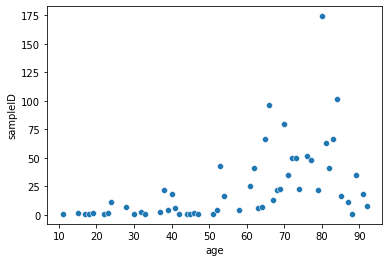

In [30]:
def mut_type(x):
    if x.mut[-1]=="T" and x.ref[0]=="C":
        
            
        return True
    else:
        return False

temp = df1[df1.apply(mut_type,axis=1)==True].merge(df2,how="left",on="sampleID")
dta = temp.groupby("age").count().reset_index()[["age","sampleID"]].sort_values(by="age")
sns.scatterplot(data=dta,x="age",y="sampleID")

In [31]:
!pip install nucleic

ERROR: Could not find a version that satisfies the requirement nucleic (from versions: none)
ERROR: No matching distribution found for nucleic


In [32]:
gene_data = dbinfo[dbinfo.gene_name=="NOTCH1"]
genetemp = gene_data[gene_data.cosmic_id.isna()==False]
Counter(genetemp.histology.explode()).most_common(10)

[('Carcinoma', 227), ('Glioma', 28), ('Malignant melanoma', 10), ('Other', 1)]

In [33]:
df1.annotation.unique()

nonsyn = ['Nonsense', 'Missense', 'Splicing']
syn = ['Synonymous']
# def antype():
    
merging.loc[merging.annotation.isin(syn),"Annotation_Type"] = "Synonymous"
merging.loc[merging.annotation.isin(nonsyn),"Annotation_Type"] = "Non-Synonymous"
# df1[df1.annotation=="Nonsense" | df1.annotation=="Missense"]  
typan = ["Non-Synonymous","Synonymous"]
typeprot = merging[merging.Annotation_Type.isin(typan)]


In [34]:
d1 = typeprot[typeprot.Annotation_Type=="Non-Synonymous"].groupby("age").mean().reset_index()
d1["Type"] = "Non-Synonymous"
d2 = typeprot[typeprot.Annotation_Type=="Synonymous"].groupby("age").mean().reset_index()
d2["Type"] = "Synonymous"

dt  = pd.concat([d1,d2],axis=0)

In [35]:
dt

age           pos           DP       VAF            Type
0    17  6.559603e+07   808.250000  0.009350  Non-Synonymous
1    18  3.658395e+07   701.500000  0.023400  Non-Synonymous
2    19  2.991031e+07   886.200000  0.013460  Non-Synonymous
3    21  1.508855e+08   924.000000  0.011900  Non-Synonymous
4    22  9.847365e+07  1138.750000  0.007900  Non-Synonymous
..  ...           ...          ...       ...             ...
46   87  2.658979e+07   966.333333  0.011233      Synonymous
47   88  5.117325e+07   947.000000  0.006300      Synonymous
48   89  1.087013e+08   987.384615  0.011938      Synonymous
49   91  1.030956e+08   819.800000  0.016160      Synonymous
50   92  1.201711e+08   826.333333  0.010400      Synonymous

[109 rows x 5 columns]

In [36]:
df2.skin_phototype

0       II
1      III
2      III
3      III
4      III
      ... 
118    III
119      I
120    III
121    III
122      I
Name: skin_phototype, Length: 123, dtype: object

In [37]:
typeprot = typeprot.merge(df2,on="sampleID",how="left")

In [38]:
typeprot =pd.get_dummies(data=typeprot,  columns=["Annotation_Type"])

In [39]:
syndf = typeprot.groupby("age").count().reset_index()[["Annotation_Type_Non-Synonymous",	"Annotation_Type_Synonymous","age"]]

KeyError: 'age'

In [ ]:
prueba = pd.melt(vafdfprot,id_vars=["age","VAF"],value_vars=["Annotation_Type_Synonymous","Annotation_Type_Non-Synonymous"])

In [ ]:

vafdfprot["VAF"]

In [ ]:
sns.lmplot(data=prueba,lowess=True,x="age",y="VAF",hue="variable")

In [ ]:
sns.lmplot(data=typeprot,x="age",y="VAF",hue="Annotation_Type")

In [ ]:

Counter(genetemp.histology.explode()).most_common(10)

In [ ]:
plts = merging[merging.mut_type=="C>T"].groupby("age").count().reset_index()[["age","VAF"]]
plts.rename(columns={"VAF":"C>T"},inplace=True)
# sns.scatterplot(data=plts,x="age",y="")ç
fig = plt.figure()
sns.lmplot(data=plts,x="C>T",y="age",logx=True).set(title="Logarithmic increase of number of C>T")



In [ ]:
temp2 = temp.groupby(["age","sun_damage_tissue"]).count().reset_index()[["age","sun_damage_tissue"]]
temp2[temp2.sun_damage_tissue=="Yes"].groupby("age").count().reset_index().sort_values(by="age")

In [ ]:
import plotly.graph_objects as go
set = ["Chronically Sun Exposure","Inttermittently Sun Exposure"]
n = [44,79]

fig = go.Figure(data=[go.Pie(labels=set, values=n,textinfo=f'label+percent+value',
                             insidetextorientation='radial',hole=.3)])
                        
fig.update_layout(annotations=[dict(text='Samples of the dataset', font_size=20, showarrow=False)])
                 
fig.show()

In [ ]:
sidcosmic = dbinfo.sampleID.unique()
# len(cosmerge.sampleID.unique())/len(merging.sampleID.unique())
dbinfo[dbinfo.sampleID==sidcosmic[0]]

# Hypothesis

In [ ]:
"https://clinicaltables.nlm.nih.gov/api/cosmic/v3/search/?df=",str("["+",".join(response.json()[3][0])+"]")